<a href="https://colab.research.google.com/github/mayanknagar97/credit-card-project/blob/main/Gold_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gold Price Prediction Project using Random Forest**

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**Exploratory Data Analysis** : Data collection and Processing 


Loading the data file to pandas dataframe 

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Number of Rows and Columns

In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Checking for missing values in data set 

In [ ]:
# Cheking percent of missing values in columns
missing_columns = (round(((gold_data.isnull().sum()/len(gold_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
Date,0.0
SPX,0.0
GLD,0.0
USO,0.0
SLV,0.0
EUR/USD,0.0


It can be observed that there is no missing data.

**Getting statistical measure of data**

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation between Data**

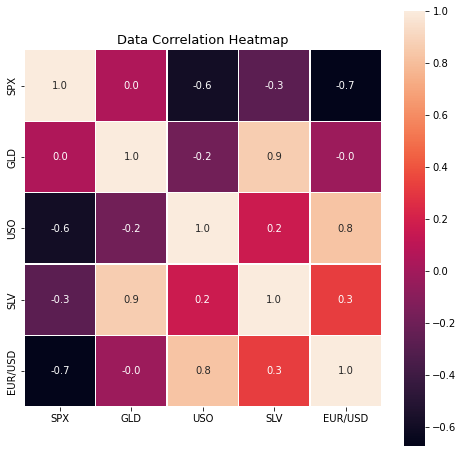

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [ ]:
correlation = gold_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, xticklabels = correlation.columns.values,square = True, yticklabels = correlation.columns.values, annot = True, fmt = '.1f', linewidths = 0.30)
plt.title('Data Correlation Heatmap', y = 1.12, size = 13, loc = "center")
plt.show()
#Print the correlation score
print(correlation['GLD'].sort_values(ascending = False), '\n')


Checking the distrtibution of Gold price

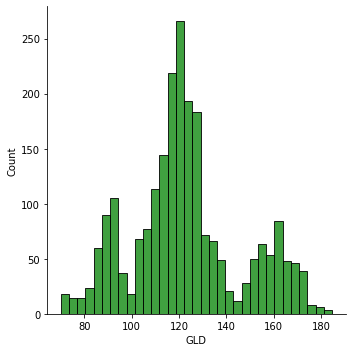

In [ ]:
sns.displot(gold_data['GLD'], color = 'green')

Using heatmap and Pairplot to show relationship between variables in better way.

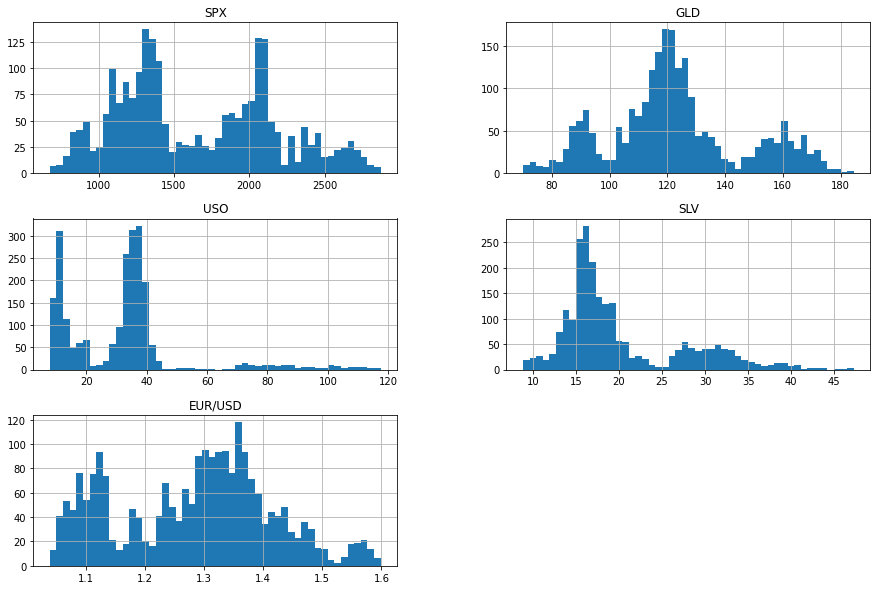

In [ ]:
gold_data.hist(bins = 50, figsize = (15,10))
plt.show()

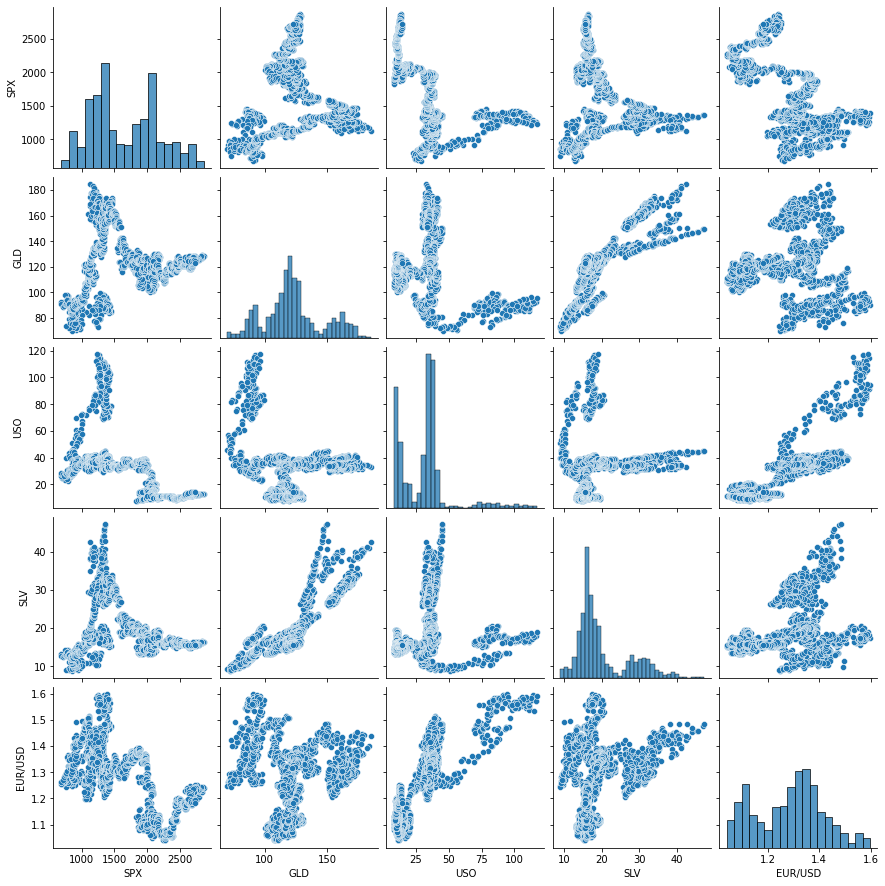

In [ ]:
sns.pairplot(gold_data.loc[:,gold_data.dtypes == 'float64'])
plt.show()

Splitting features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)


**Model Training**

Random Forest Regression

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

Training the model

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#Prediction on Test data

In [ ]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)


[168.51879921  82.14309975 116.41440018 127.683901   120.56960114
 154.64779783 150.43719804 126.25290012 117.69429874 125.96050046
 116.64060129 172.04470108 141.609099   167.57219846 115.12039985
 117.71440054 139.34720244 169.98290072 159.5518032  157.98779924
 155.10329995 125.30580035 176.56299917 157.18010363 125.27460057
  93.77799987  77.2592002  120.70970026 119.12989966 167.55379883
  88.40250035 125.43450026  91.21360073 117.82159992 121.0691989
 135.99560077 115.53920108 115.18250098 148.96579989 107.16080103
 104.38150234  87.16369796 126.43580049 117.88610034 152.44869875
 119.62359977 108.39999989 107.99259844  93.20070047 127.00559829
  74.6971004  113.69699938 121.06920016 111.29889915 118.79109886
 120.53259941 158.33459937 168.09970049 147.08279677  86.05319923
  94.46970023  86.82139868  90.43049991 119.00110067 126.40280048
 127.61750024 168.72019941 122.38929921 117.60999861  98.51190063
 168.10600121 143.13489845 132.28060204 121.17670235 120.89149955
 119.636600

In [ ]:
accuracy_train = regressor.score(X_train, Y_train)
accuracy_test = regressor.score(X_test, Y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

Training Accuracy:  0.9984328545422797
Testing Accuracy:  0.9888770875665323


Error Checking from Regression

In [ ]:
print('MAE :'," ", metrics.mean_absolute_error(Y_test,test_data_prediction))
print('MSE :'," ", metrics.mean_squared_error(Y_test,test_data_prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,test_data_prediction)))

MAE :   1.323167705327505
MSE :   5.8667078713716725
RMAE :   2.422128789179401


In [ ]:
#R Square Error

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print('R Square Error:',error_score)

R Square Error: 0.9888770875665323


Compairing actual value with predicted value in a plot

In [ ]:
#compairing Y_test into list

In [ ]:
Y_test = list(Y_test)

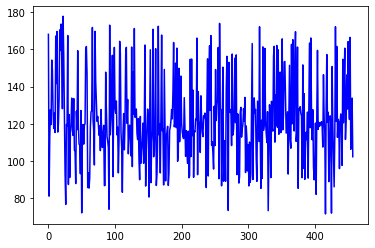

In [ ]:
plt.plot(Y_test,color = 'blue',label = 'Actual Value ')

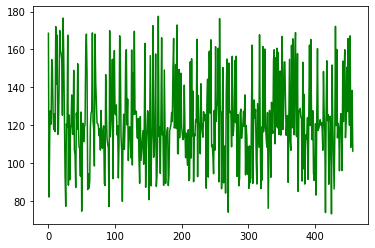

In [ ]:
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')

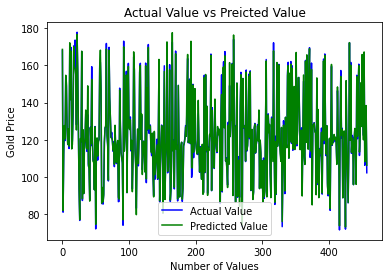

In [ ]:
plt.plot(Y_test, color = 'blue',label = "Actual Value")
plt.plot(test_data_prediction, color = "green",label = "Predicted Value")
plt.title("Actual Value vs Preicted Value")
plt.xlabel("Number of Values")
plt.ylabel('Gold Price')
plt.legend()
plt.show()


